In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# قراءة ملف CSV بعد الرفع
df = pd.read_csv("supply_chain_data.csv")

# عرض أول 5 صفوف
df.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())
print("\nDuplicated rows:", df.duplicated().sum())
print("\nMissing values:")
print(df.isnull().sum())


Shape: (100, 24)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Loc

In [4]:
# إزالة الصفوف المكررة
df.drop_duplicates(inplace=True)

# معالجة القيم المفقودة
# (مثال فقط — يمكن تعديل الأعمدة حسب الموجود في الداتا)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# تعديل أسماء الأعمدة لتكون سهلة التعامل
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

# تحويل الأعمدة اللي فيها تواريخ (إن وجدت)
date_columns = [c for c in df.columns if 'date' in c]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print("✅ Data cleaned successfully!")
df.info()


✅ Data cleaned successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             100 non-null    object 
 1   sku                      100 non-null    object 
 2   price                    100 non-null    float64
 3   availability             100 non-null    int64  
 4   number_of_products_sold  100 non-null    int64  
 5   revenue_generated        100 non-null    float64
 6   customer_demographics    100 non-null    object 
 7   stock_levels             100 non-null    int64  
 8   lead_times               100 non-null    int64  
 9   order_quantities         100 non-null    int64  
 10  shipping_times           100 non-null    int64  
 11  shipping_carriers        100 non-null    object 
 12  shipping_costs           100 non-null    float64
 13  supplier_name            100 non-null    object 
 14

/tmp/ipython-input-917957717.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-917957717.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

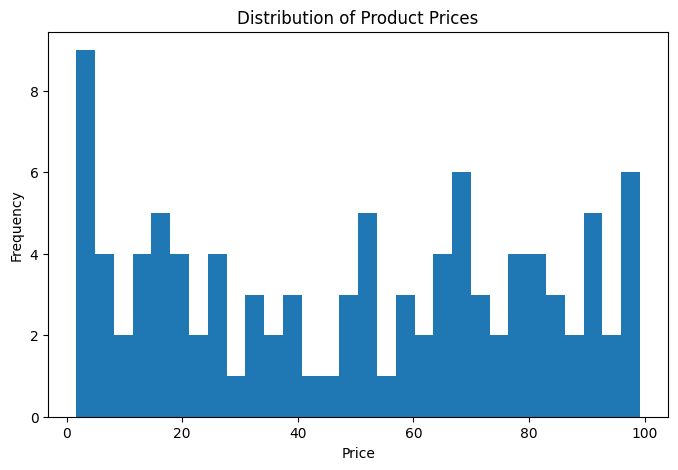

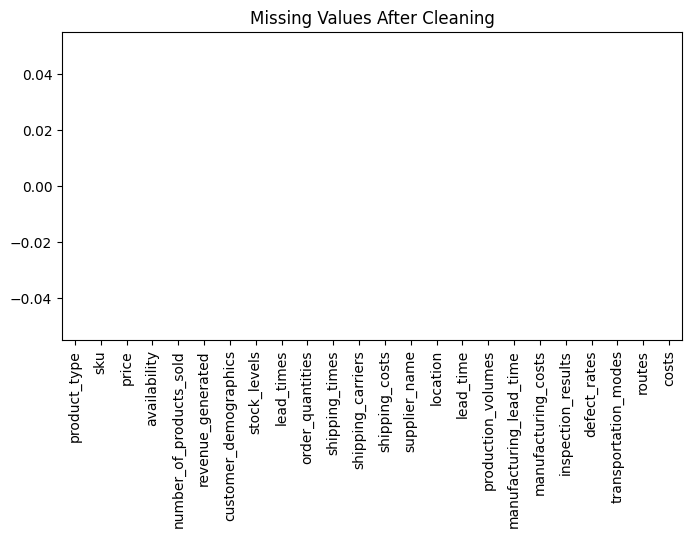

In [5]:
# مثال: رسم توزيع الأسعار لو فيه عمود اسمه "price"
if 'price' in df.columns:
    plt.figure(figsize=(8,5))
    plt.hist(df['price'], bins=30)
    plt.title('Distribution of Product Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

# التحقق من القيم المفقودة بعد التنظيف
plt.figure(figsize=(8,4))
df.isnull().sum().plot(kind='bar')
plt.title("Missing Values After Cleaning")
plt.show()


In [6]:
df.to_csv("cleaned_supply_chain_data.csv", index=False)
print("✅ Cleaned dataset saved as cleaned_supply_chain_data.csv")


✅ Cleaned dataset saved as cleaned_supply_chain_data.csv


In [7]:
from google.colab import files
files.download("cleaned_supply_chain_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>